KoNLPy 라이브러리 설치

In [4]:
!apt-get update
!apt-get install g++ openjdk-8-jdk python-dev python3-dev
!pip install JPype1-py3
!pip install konlpy

#knoply는 java의 jdk Jpype가 설치되지 않으면 깔리지가 않는다.

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [1,183 kB]
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http:/

In [5]:
!wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt -O ratings.txt

--2022-10-11 04:32:52--  https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19515078 (19M) [text/plain]
Saving to: ‘ratings.txt’

ratings.txt         100%[===================>]  18.61M  --.-KB/s    in 0.05s   

2022-10-11 04:32:55 (390 MB/s) - ‘ratings.txt’ saved [19515078/19515078]



In [6]:
import pandas as pd

train_data = pd.read_table('ratings.txt')

In [7]:
train_data

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...
199995,8963373,포켓 몬스터 짜가 ㅡㅡ;;,0
199996,3302770,쓰.레.기,0
199997,5458175,완전 사이코영화. 마지막은 더욱더 이 영화의질을 떨어트린다.,0
199998,6908648,왜난 재미없었지 ㅠㅠ 라따뚜이 보고나서 스머프 봐서 그런가 ㅋㅋ,0


In [8]:
#널(null)값 행 제거
train_data = train_data.dropna(how='any') # .dropna(how='any') 는 Nan값이 있는 행/열을 없애는 역할을 함
print(len(train_data))

199992


In [9]:
#정규표현식(Regular Expression)을 이용해 한글 데이터만 남기기
train_data['document']=train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ가-힣-ㄴㅏ]","") # []: 괄호안에 있는 모든 문자열 ^: ^안에있는 문자열 앞 부분의 인접 문자와 일치합니다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
# https://too-march.tistory.com/15  koNLPy의 모든 것이 담겨있음

## 한글 형태소 분석 및 토근화 수행

In [11]:
# 한글 형태소 분석기를 이용해 토큰화 작업을 수행하기
from konlpy.tag import Okt # Okt : 한글 형태소 분석기

tokenized_dataset = []
stopwords=['은','는','이','가','을','를'] #불용어 정의
okt=Okt() # 한글 형태소 분석기 라이브러리 객체 선언

for w in train_data['document']:
  tokenized= okt.morphs(w,stem=True)      #stem=True : 동사의 원형을 찾아주는 개념 #morpths : 형태소 단위로 구문분석
  tokenized = [word for word in tokenized if not word in stopwords]
  tokenized_dataset.append(tokenized)


In [12]:
print(len(tokenized))

7


In [13]:
tokenized

['포', '풍', '저그', '나가다', '영차', '영차', '영차']

In [14]:
print(tokenized_dataset[0])
print(tokenized_dataset[1])

['어리다', '때', '보고', '지금', '다시', '보다', '재밌다', 'ㅋㅋ']
['디자인', '배우다', '학생', '으로', '외국', '디자이너', '와', '그', '들', '일군', '전통', '통해', '발전', '하다', '문화', '산업', '부럽다', '사실', '우리나라', '에서도', '그', '어렵다', '시절', '에', '끝', '까지', '열정', '지키다', '노라노', '같다', '전통', '있다', '저', '와', '같다', '사람', '들', '꿈', '꾸다', '이루다', '나가다', '수', '있다', '것', '에', '감사하다']


리뷰의 최대 길이 : 75
리뷰의 평균 길이 : 11.741709668386736


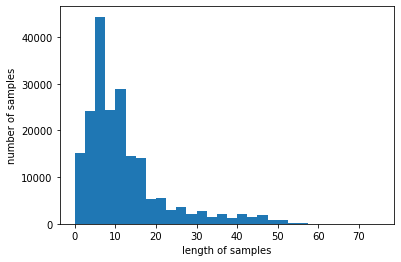

In [15]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_dataset))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_dataset))/len(tokenized_dataset))

#리뷰에 포함된 토큰의 개수 분포
plt.hist([len(s) for s in tokenized_dataset], bins=30)
plt.xlabel('length of samples') # 각 토큰 길이의 분포 ex. 7글자~50글자
plt.ylabel('number of samples') # 각 토큰 길이의 수 ex. 7글자 갯수는 몇개?
plt.show()

### Word2Vec 학습 진행 및 결과 확인
gensim: Numpy, SciPy 등으로 구현된 오픈소스 자연어 처리 라이브러리로, Word2Vec 클래스를 지원합니다.


*  size: 임베딩 벡터의 차원

*   window: 윈도우 크기
*   min_count: 단어 최소 빈도수
*   workers: 학습을 위해 사용하는 프로세스 수








sg: 0 = CBOW, 1 = Skip-gram

In [16]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=tokenized_dataset, size=100, window=10, workers=4, sg=1)

In [17]:
print(model)

Word2Vec(vocab=16496, size=100, alpha=0.025)


In [18]:
model.wv.vectors.shape

(16496, 100)

In [35]:
print(model.wv.most_similar('꿀잼'))



[('개잼', 0.8026727437973022), ('졸잼', 0.7883687019348145), ('꿀잼임', 0.7847371101379395), ('개꿀잼', 0.7815098762512207), ('핵잼', 0.772777795791626), ('허니', 0.7727588415145874), ('잼잼', 0.7627474069595337), ('핵꿀잼', 0.751818835735321), ('재밋음', 0.7308895587921143), ('꿀', 0.7199594974517822)]
